In [ ]:
import pandas as pd
df = pd.read_csv("/content/english  predict sport.csv")
print(df.shape)

(296, 13)


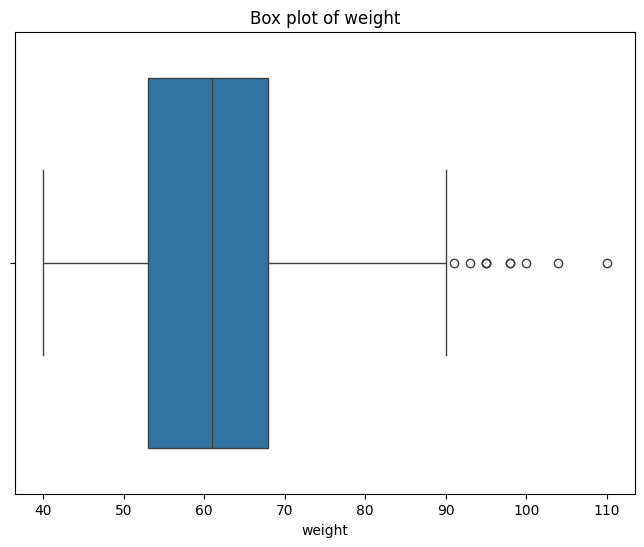

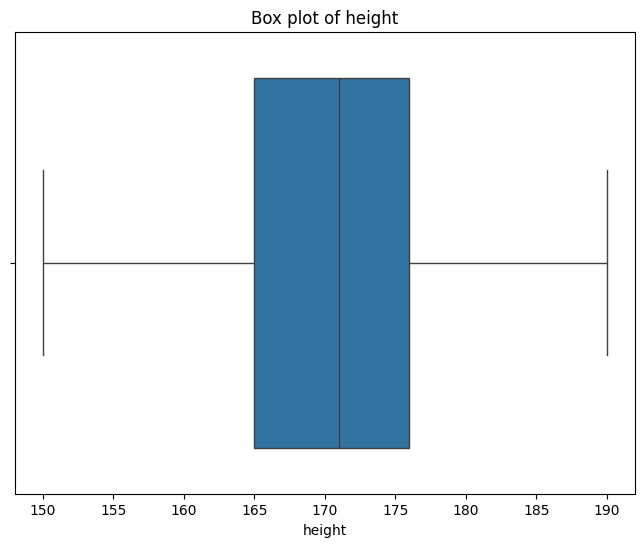

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
numerical_vars = ['weight', 'height']

for col in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.show()

In [ ]:
print("Missing values per column:")         ####เช็คค่าว่าง
print(df.isnull().sum())

print("\nNumber of duplicate rows:")      ####เช็คค่าซํ้า
print(df.duplicated().sum())

Missing values per column:
weight              0
height              0
gender              0
location            0
Physical Contact    0
play_type           0
chest_symptom       0
injury              0
disease             0
jumping             0
endurance           0
agility             0
preferred_sport     0
dtype: int64

Number of duplicate rows:
3


In [ ]:
duplicate_rows = df[df.duplicated(keep=False)]
print("แถวที่ซ้ำกันทั้งหมด:")
display(duplicate_rows)

แถวที่ซ้ำกันทั้งหมด:


,weight,height,gender,location,Physical Contact,play_type,chest_symptom,injury,disease,jumping,endurance,agility,preferred_sport
94,66,172,male,outdoor,like,team,no,no,yes,yes,yes,yes,football
98,52,174,male,outdoor,like,team,no,no,no,yes,yes,yes,football
150,75,170,male,indoor,dislike,pair,yes,no,no,no,no,yes,badminton
248,66,172,male,outdoor,like,team,no,no,yes,yes,yes,yes,football
249,75,170,male,indoor,dislike,pair,yes,no,no,no,no,yes,badminton
263,52,174,male,outdoor,like,team,no,no,no,yes,yes,yes,football


In [ ]:
df.drop_duplicates(inplace=True)

print("Number of duplicate rows after removal:")
print(df.duplicated().sum())

print("\nShape of the dataframe after removing duplicates:")
print(df.shape)

Number of duplicate rows after removal:
0

Shape of the dataframe after removing duplicates:
(293, 13)


In [ ]:
# Display descriptive statistics for weight and height
print("สถิติเชิงพรรณนาของส่วนสูง:")
print(df['height'].describe())

print("\nสถิติเชิงพรรณนาของนํ้าหนัก:")
print(df['weight'].describe())

สถิติเชิงพรรณนาของส่วนสูง:
count    293.000000
mean     170.017065
std        8.358597
min      150.000000
25%      165.000000
50%      171.000000
75%      176.000000
max      190.000000
Name: height, dtype: float64

สถิติเชิงพรรณนาของนํ้าหนัก:
count    293.000000
mean      62.484642
std       12.496737
min       40.000000
25%       53.000000
50%       61.000000
75%       68.000000
max      110.000000
Name: weight, dtype: float64


In [ ]:
df['playtype'] = df['play_type'].replace(['solo', 'pair'], 'solo_pair')
display(df[['play_type', 'playtype']].head())
df = df.drop(columns=["play_type"])


,play_type,playtype
0,pair,solo_pair
1,team,team
2,solo,solo_pair
3,team,team
4,solo,solo_pair


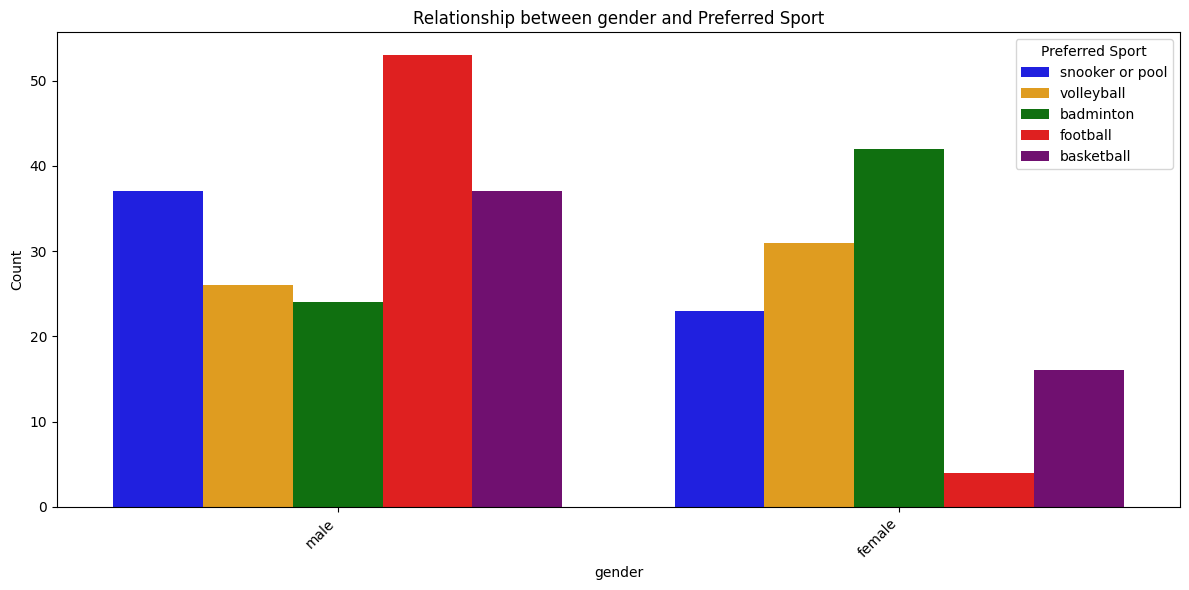

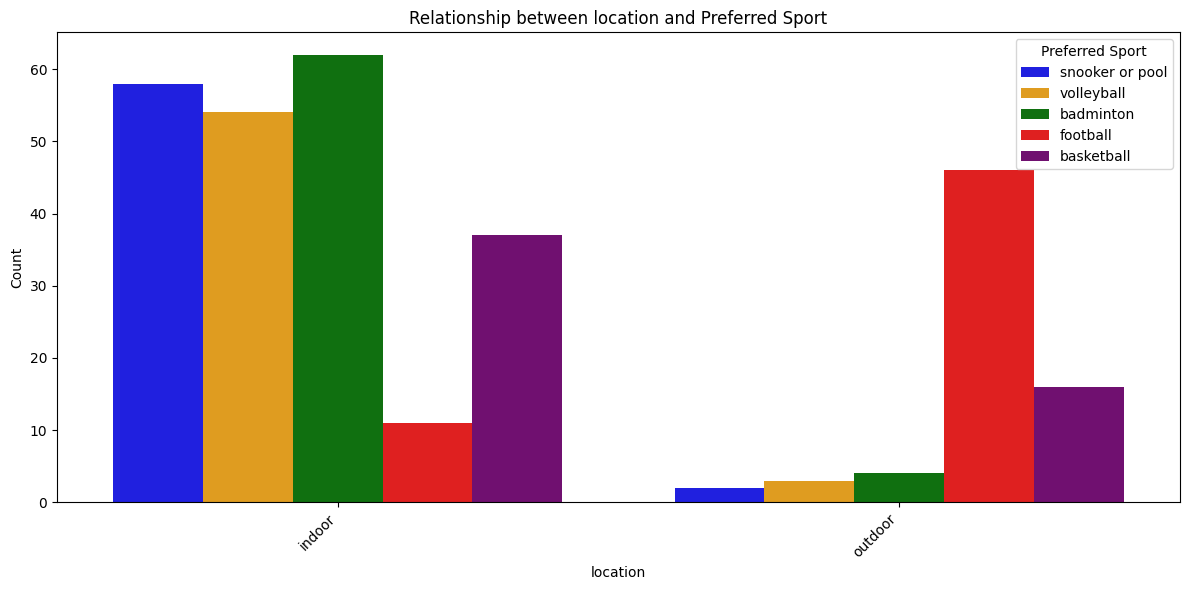

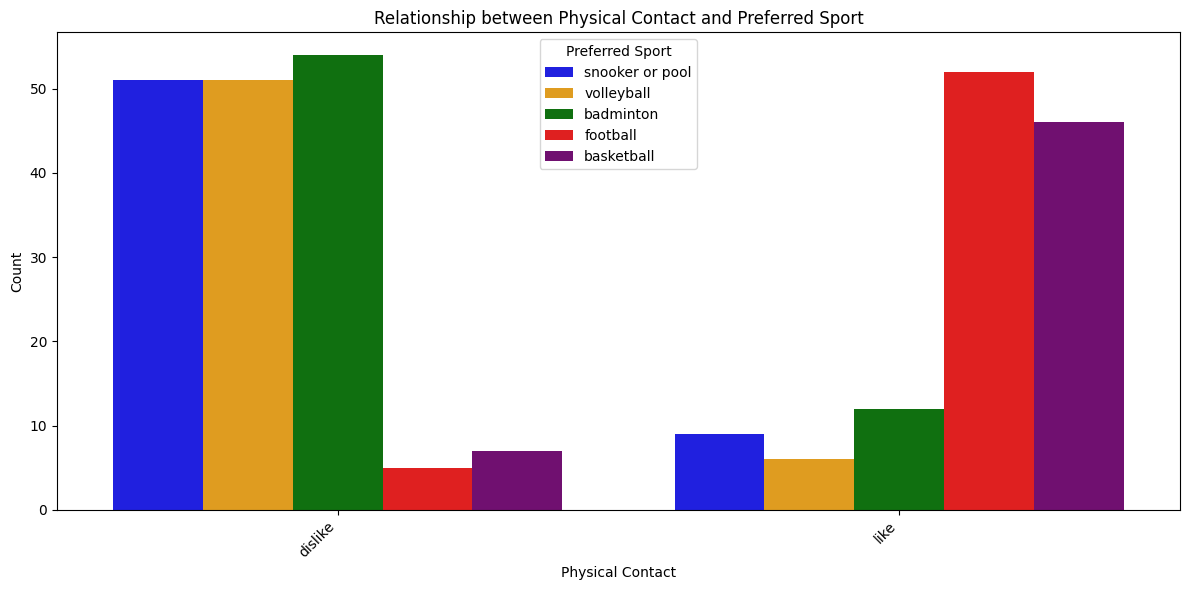

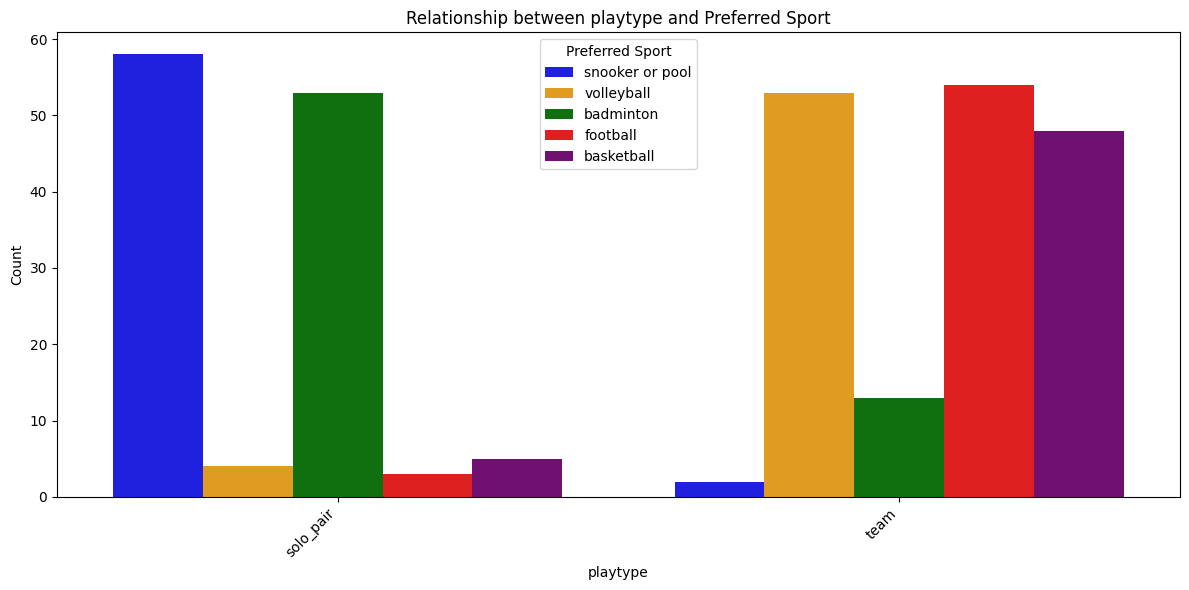

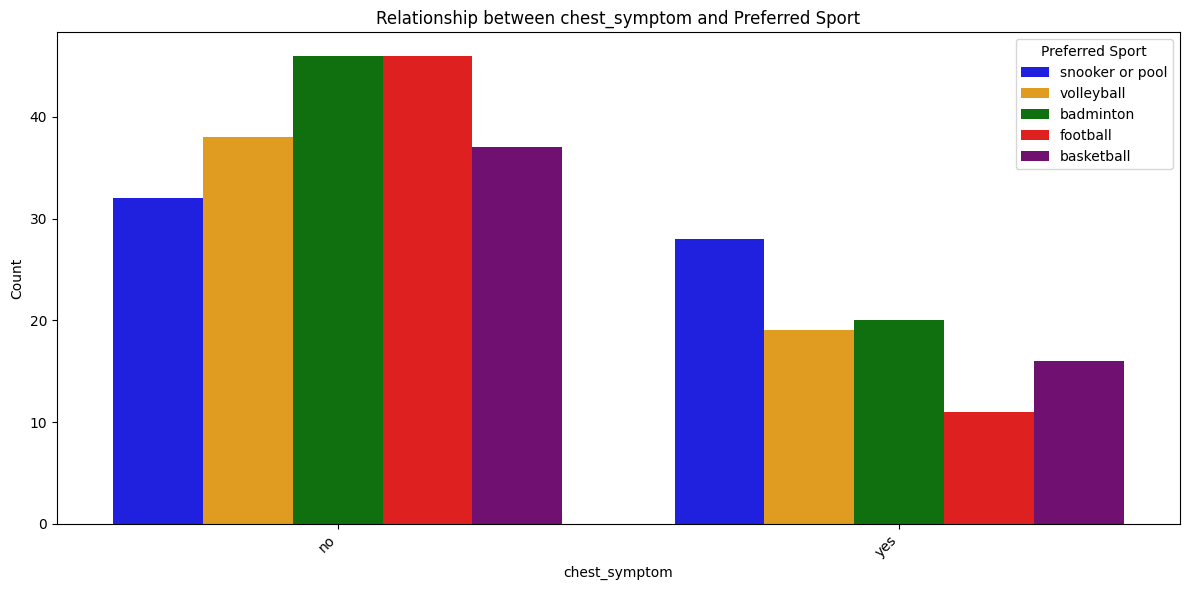

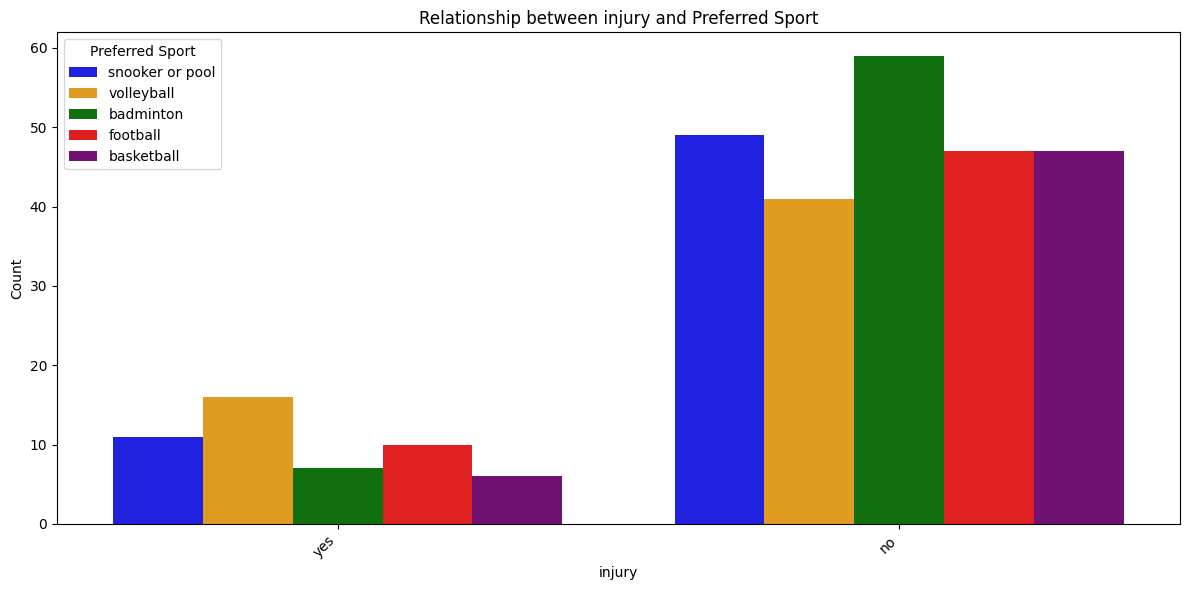

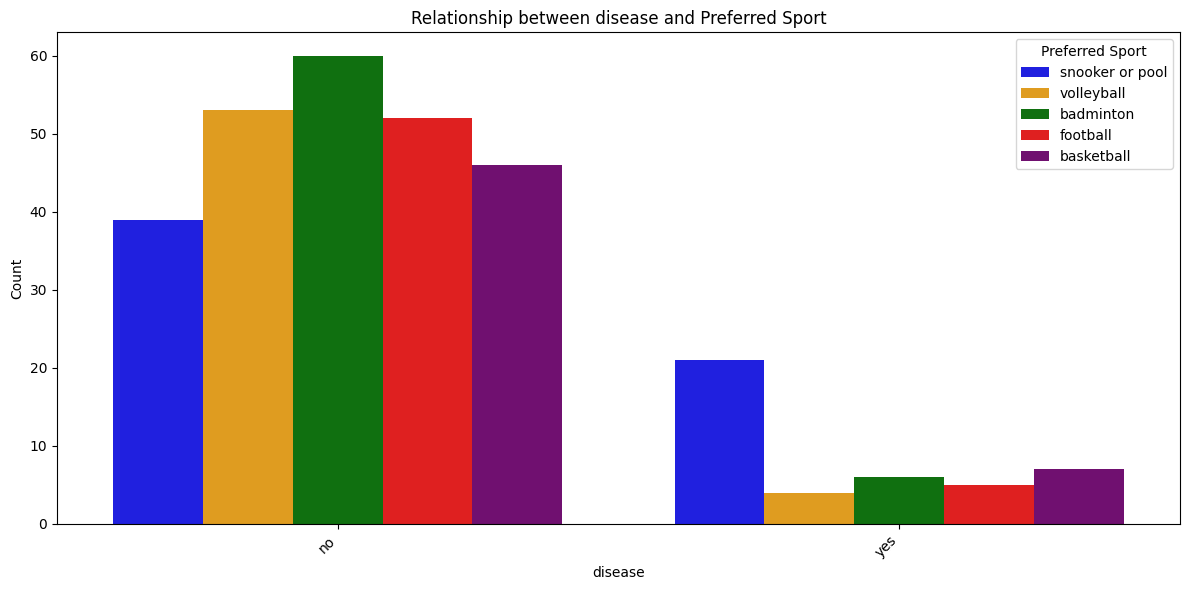

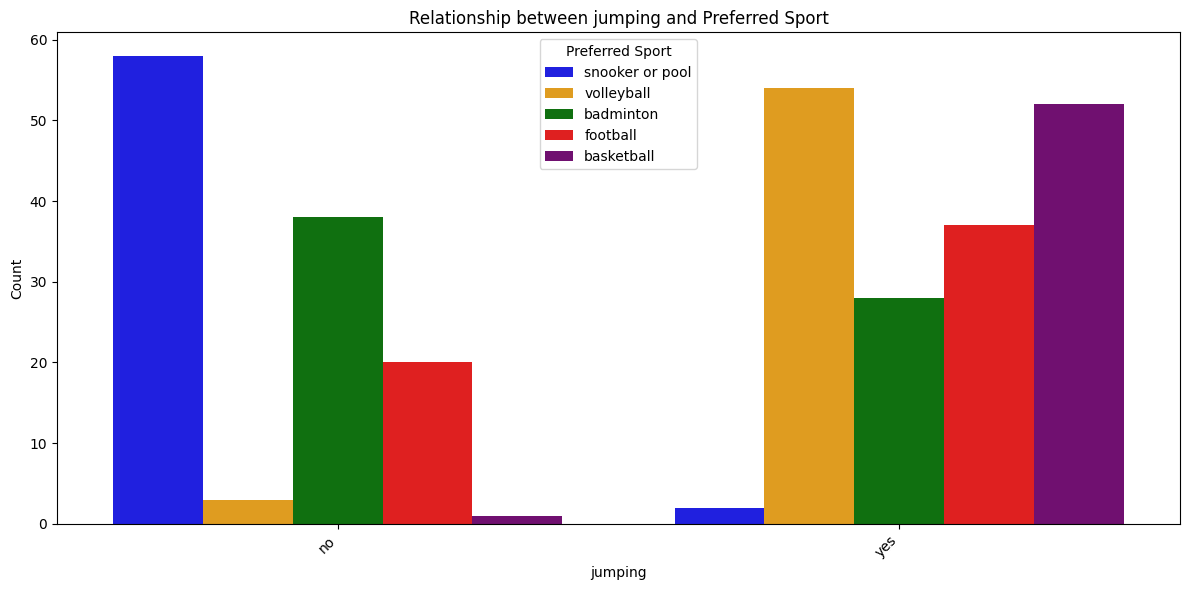

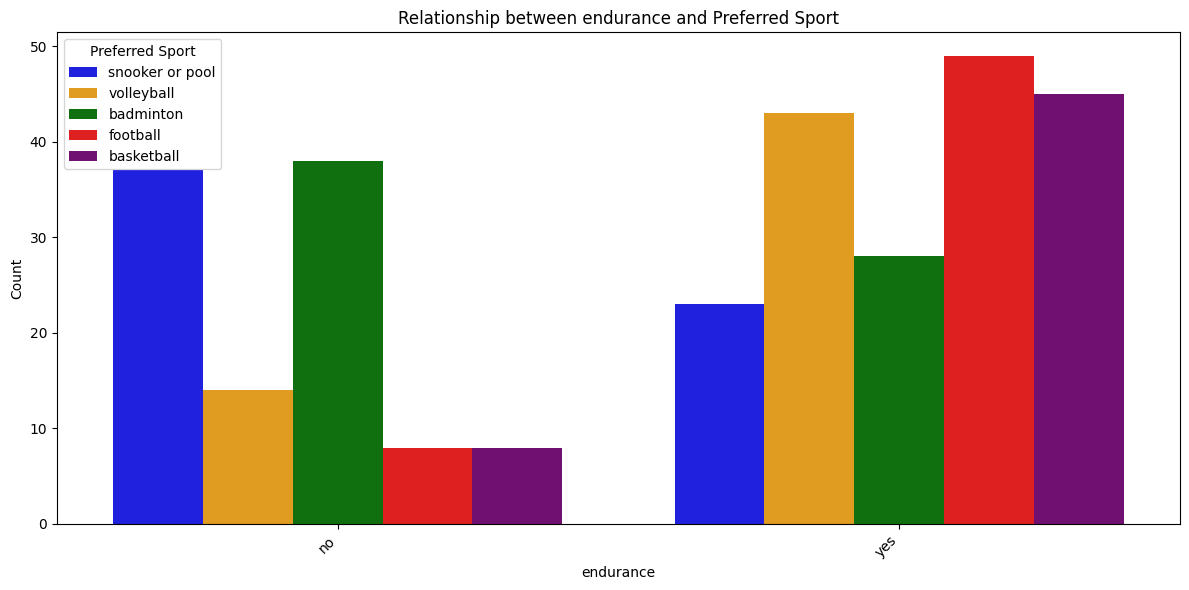

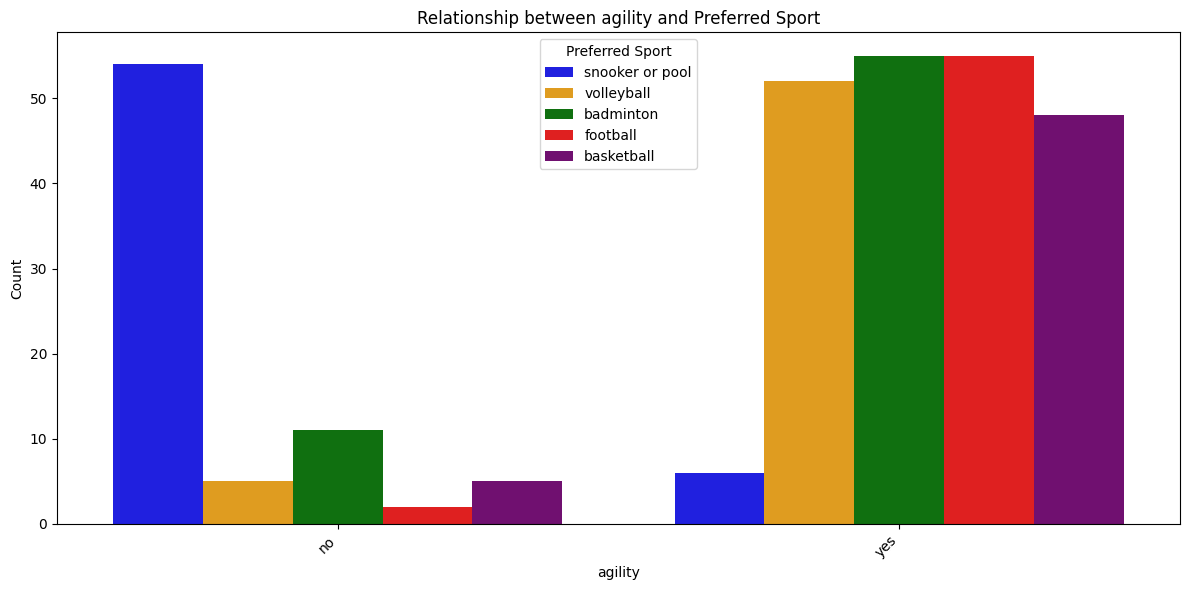

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette for preferred sports
sport_palette = {
    'snooker or pool': 'blue',
    'volleyball': 'orange',
    'badminton': 'green',
    'football': 'red',
    'basketball': 'purple'
}

categorical_independent_vars = ['gender','location', 'Physical Contact', 'playtype',
                                'chest_symptom', 'injury', 'disease', 'jumping', 'endurance', 'agility']

for col in categorical_independent_vars:
    plt.figure(figsize=(12, 6))
    # Use the custom palette for the hue
    sns.countplot(x=col, hue='preferred_sport', data=df, palette=sport_palette)
    plt.title(f'Relationship between {col} and Preferred Sport')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Preferred Sport')
    plt.tight_layout()
    plt.show()

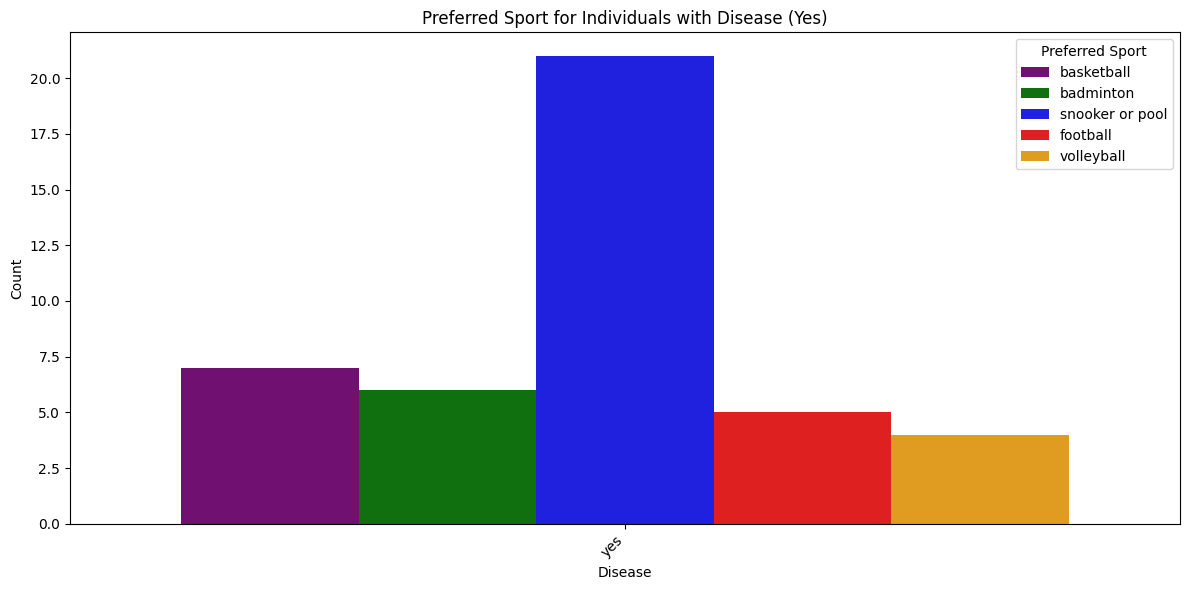

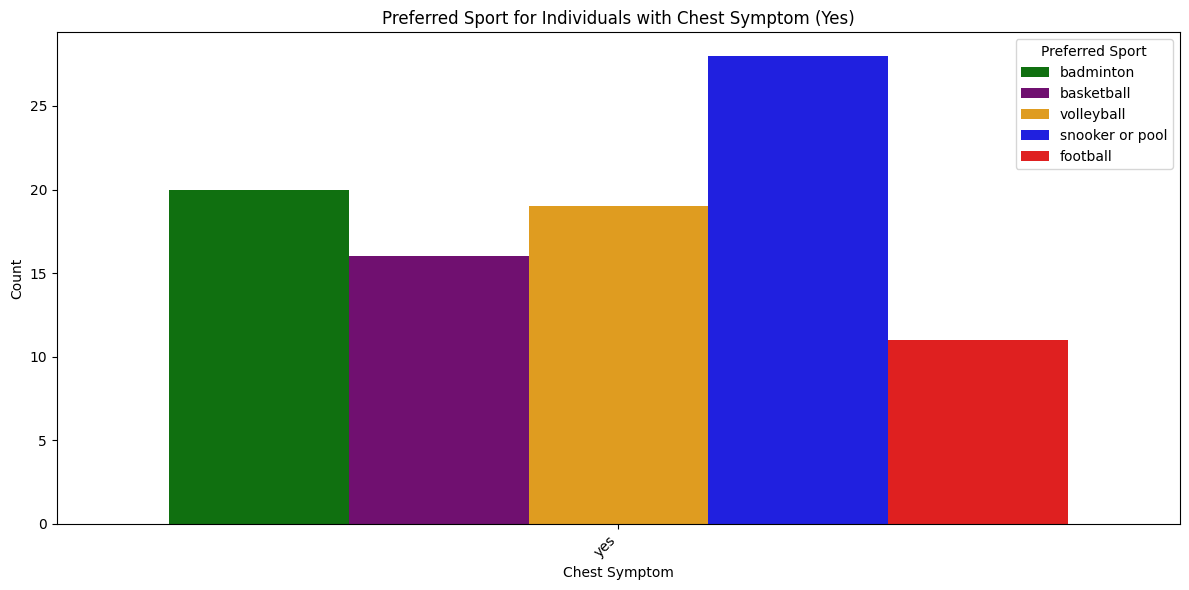

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the same custom color palette as in the previous cell
sport_palette = {
    'snooker or pool': 'blue',
    'volleyball': 'orange',
    'badminton': 'green',
    'football': 'red',
    'basketball': 'purple'
}

# Filter the DataFrame to include only rows where 'disease' is 'yes'
disease_yes_df = df[df['disease'] == 'yes']

# Create a count plot for 'disease' = 'yes' vs 'preferred_sport' using the custom palette
plt.figure(figsize=(12, 6))
sns.countplot(x='disease', hue='preferred_sport', data=disease_yes_df, palette=sport_palette) # Use custom palette
plt.title('Preferred Sport for Individuals with Disease (Yes)')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Preferred Sport')
plt.tight_layout()
plt.show()

# Filter the DataFrame to include only rows where 'chest_symptom' is 'yes'
chest_symptom_yes_df = df[df['chest_symptom'] == 'yes']

# Create a count plot for 'chest_symptom' = 'yes' vs 'preferred_sport' using the custom palette
plt.figure(figsize=(12, 6))
sns.countplot(x='chest_symptom', hue='preferred_sport', data=chest_symptom_yes_df, palette=sport_palette) # Use custom palette
plt.title('Preferred Sport for Individuals with Chest Symptom (Yes)')
plt.xlabel('Chest Symptom')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Preferred Sport')
plt.tight_layout()
plt.show()

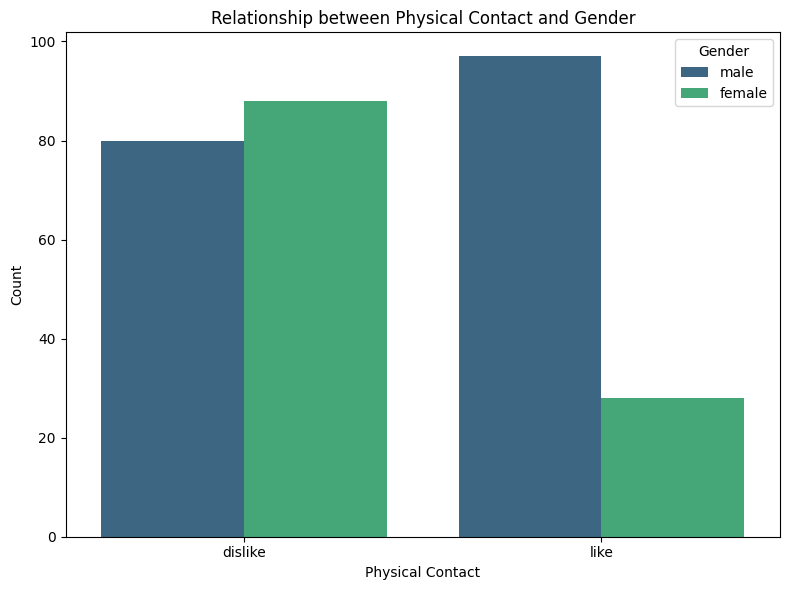

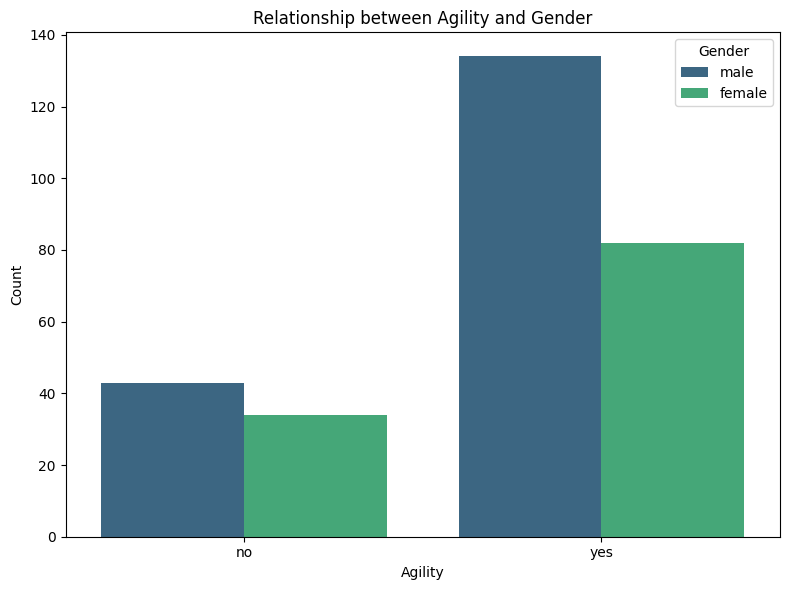

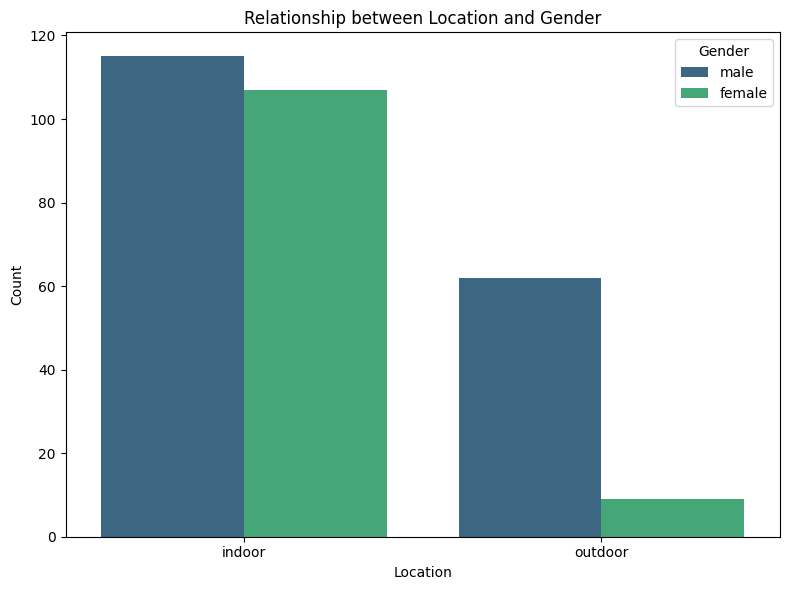

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Relationship between Physical Contact and Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Physical Contact', hue='gender', data=df, palette='viridis')
plt.title('Relationship between Physical Contact and Gender')
plt.xlabel('Physical Contact')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Relationship between Agility and Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='agility', hue='gender', data=df, palette='viridis')
plt.title('Relationship between Agility and Gender')
plt.xlabel('Agility')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Relationship between Location and Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='location', hue='gender', data=df, palette='viridis')
plt.title('Relationship between Location and Gender')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

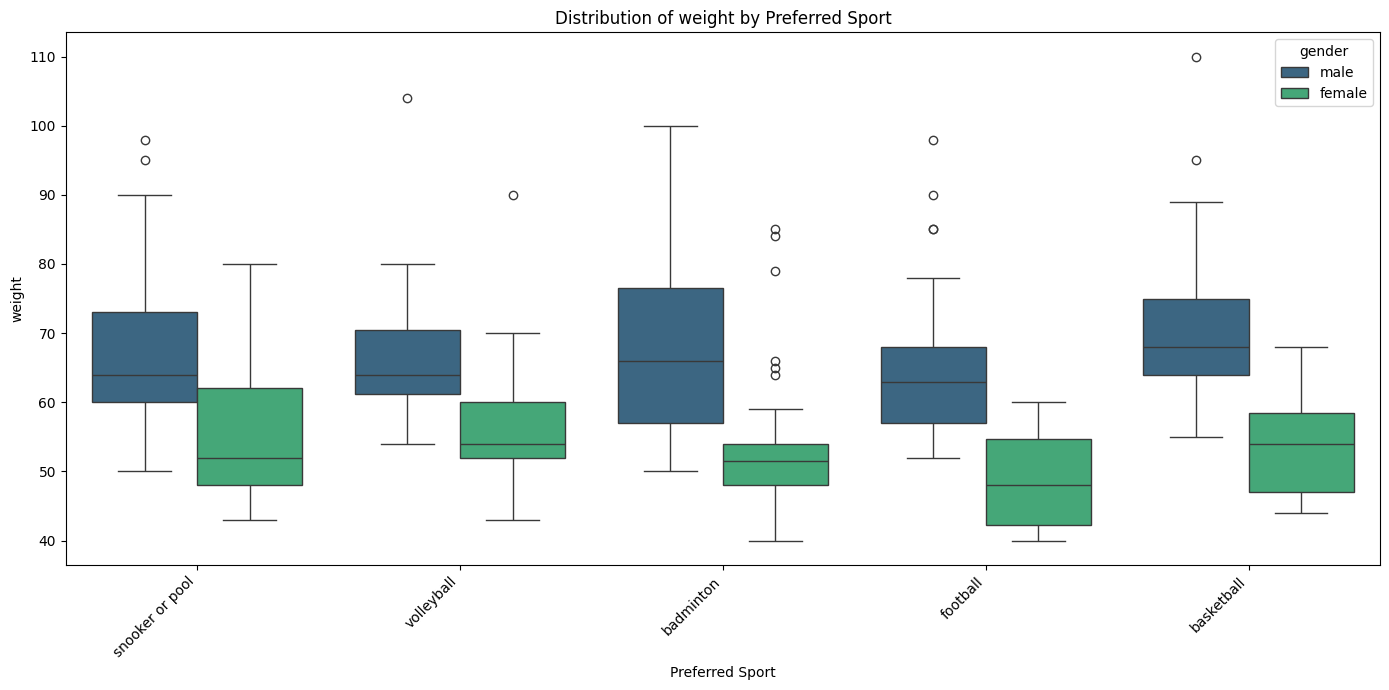

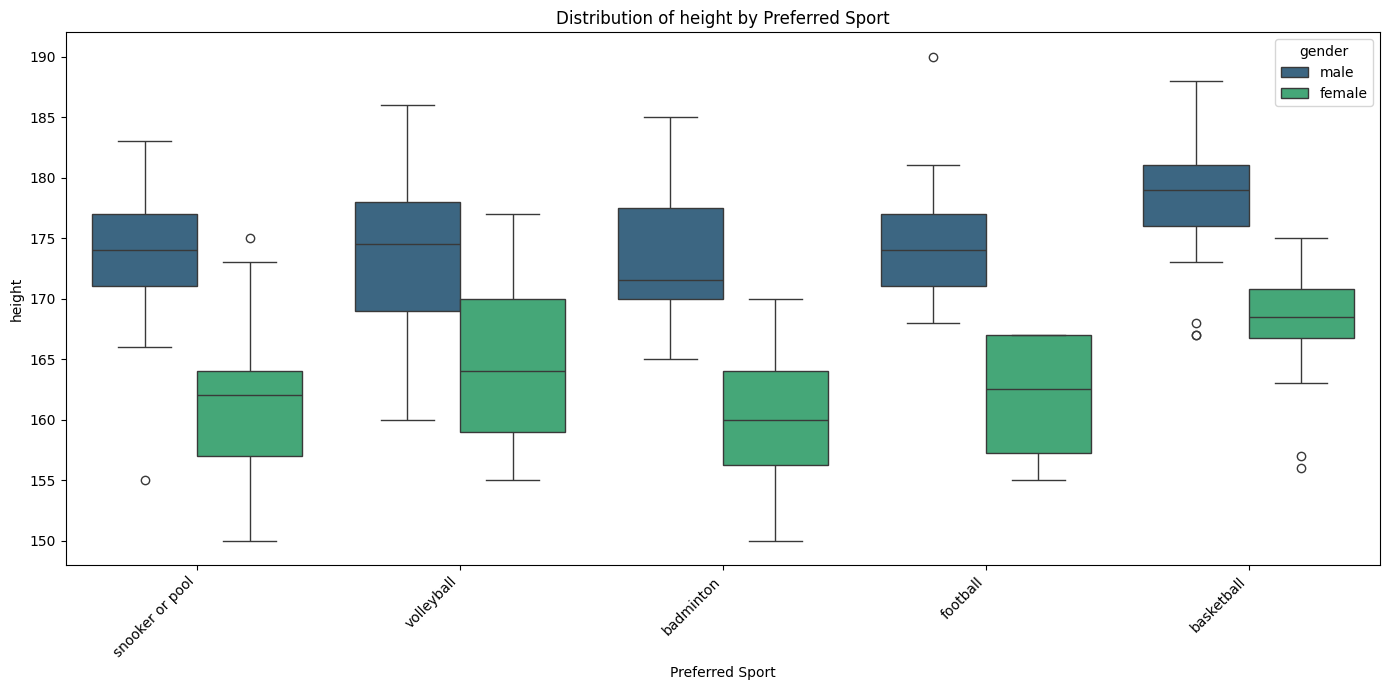

In [ ]:
numerical_vars = ['weight','height']

for col in numerical_vars:
    plt.figure(figsize=(14, 7))  # ปรับขนาดกราฟ
    sns.boxplot(x='preferred_sport', y=col, data=df, hue = 'gender' ,palette='viridis')  # Boxplot
    plt.title(f'Distribution of {col} by Preferred Sport')  # ชื่อกราฟ
    plt.xlabel('Preferred Sport')
    plt.ylabel(col)
    plt.xticks(rotation=45, ha='right')  # หมุน label
    plt.tight_layout()
    plt.show()


In [ ]:
df_d = df.drop(columns=["weight"])

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
df_encoded_1 = df_d
categorical_cols_label = ['gender', 'location', 'Physical Contact','playtype',
                          'chest_symptom', 'injury', 'disease', 'jumping', 'endurance', 'agility']
# สร้าง Dictionary เก็บการแปลงค่า Label Encoding
encoding_mappings_label_part1 = {}
# ใช้ Label Encoding กับแต่ละคอลัมน์ที่กำหนด
for col in categorical_cols_label:
    label_encoder = LabelEncoder()
    df_encoded_1[col] = label_encoder.fit_transform(df_encoded_1[col])
    encoding_mappings_label_part1[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
display(df_encoded_1.head())

,height,gender,location,Physical Contact,chest_symptom,injury,disease,jumping,endurance,agility,preferred_sport,playtype
0,172,1,0,0,0,1,0,0,0,0,snooker or pool,0
1,168,0,0,0,0,0,0,1,1,1,volleyball,1
2,160,0,0,0,0,1,0,1,0,0,badminton,0
3,170,0,0,1,0,0,0,1,1,1,badminton,1
4,177,1,1,1,0,0,0,1,1,1,snooker or pool,0


In [ ]:
print("\nLabel Encoding Mappings (ตัวแปรประเภทอื่นๆ):")
for col, mapping in encoding_mappings_label_part1.items():
    print(f"{col}: {mapping}")


Label Encoding Mappings (ตัวแปรประเภทอื่นๆ):
gender: {'female': np.int64(0), 'male': np.int64(1)}
location: {'indoor': np.int64(0), 'outdoor': np.int64(1)}
Physical Contact: {'dislike': np.int64(0), 'like': np.int64(1)}
playtype: {'solo_pair': np.int64(0), 'team': np.int64(1)}
chest_symptom: {'no': np.int64(0), 'yes': np.int64(1)}
injury: {'no': np.int64(0), 'yes': np.int64(1)}
disease: {'no': np.int64(0), 'yes': np.int64(1)}
jumping: {'no': np.int64(0), 'yes': np.int64(1)}
endurance: {'no': np.int64(0), 'yes': np.int64(1)}
agility: {'no': np.int64(0), 'yes': np.int64(1)}


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
df_encoded_final = df_encoded_1.copy()
# ใช้ Label Encoding กับ 'preferred_sport' และกำหนดช่วงตัวเลข 1-5
label_encoder_sport = LabelEncoder()
df_encoded_final['preferred_sport_encoded'] = label_encoder_sport.fit_transform(df_encoded_final['preferred_sport']) + 1 # บวก 1 เพื่อให้ค่าอยู่ในช่วง 1-5
encoding_mappings_sport = dict(zip(label_encoder_sport.classes_, label_encoder_sport.transform(label_encoder_sport.classes_) + 1))

df_final = df_encoded_final.drop(columns = 'preferred_sport')
display(df_final.head())

,height,gender,location,Physical Contact,chest_symptom,injury,disease,jumping,endurance,agility,playtype,preferred_sport_encoded
0,172,1,0,0,0,1,0,0,0,0,0,4
1,168,0,0,0,0,0,0,1,1,1,1,5
2,160,0,0,0,0,1,0,1,0,0,0,1
3,170,0,0,1,0,0,0,1,1,1,1,1
4,177,1,1,1,0,0,0,1,1,1,0,4


In [ ]:
# แสดงการแปลงค่า Label Encoding สำหรับ 'preferred_sport'
print("\nLabel Encoding Mapping สำหรับ 'preferred_sport':")
print(encoding_mappings_sport)

# แสดงขนาดของ DataFrame ที่เข้ารหัสสมบูรณ์แล้ว
print("\nShape of the fully encoded DataFrame:")
print(df_encoded_final.shape)


Label Encoding Mapping สำหรับ 'preferred_sport':
{'badminton': np.int64(1), 'basketball': np.int64(2), 'football': np.int64(3), 'snooker or pool': np.int64(4), 'volleyball': np.int64(5)}

Shape of the fully encoded DataFrame:
(293, 13)


In [ ]:

output_filename = "projectsport1.csv"

df_final.to_csv(output_filename, index=False)

print(f"DataFrame ที่ประมวลผลแล้วถูกบันทึกเป็นไฟล์: {output_filename}")

DataFrame ที่ประมวลผลแล้วถูกบันทึกเป็นไฟล์: projectsport1.csv


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_final["height"] = scaler.fit_transform(df_final[["height"]])
display(df_final.head())


,height,gender,location,Physical Contact,chest_symptom,injury,disease,jumping,endurance,agility,playtype,preferred_sport_encoded
0,0.237639,1,0,0,0,1,0,0,0,0,0,4
1,-0.241729,0,0,0,0,0,0,1,1,1,1,5
2,-1.200465,0,0,0,0,1,0,1,0,0,0,1
3,-0.002045,0,0,1,0,0,0,1,1,1,1,1
4,0.836849,1,1,1,0,0,0,1,1,1,0,4


In [ ]:
df_final.to_csv("/content/scaleprojectsport1.csv", index=False)
print("ไฟล์ถูกบันทึกเป็น scaleprojectsport1.csv")

ไฟล์ถูกบันทึกเป็น scaleprojectsport1.csv


In [ ]:
df_1 = pd.read_csv("/content/projectsport1.csv")
df_11 = pd.read_csv("/content/scaleprojectsport1.csv")
print("แบบไม่scale")
print(df_1.shape)
print("แบบscale")
print(df_11.shape)


แบบไม่scale
(293, 12)
แบบscale
(293, 12)


In [ ]:
print("แบบไม่scale")
df_1


แบบไม่scale


,height,gender,location,Physical Contact,chest_symptom,injury,disease,jumping,endurance,agility,playtype,preferred_sport_encoded
0,172,1,0,0,0,1,0,0,0,0,0,4
1,168,0,0,0,0,0,0,1,1,1,1,5
2,160,0,0,0,0,1,0,1,0,0,0,1
3,170,0,0,1,0,0,0,1,1,1,1,1
4,177,1,1,1,0,0,0,1,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
288,179,1,0,1,1,0,0,1,1,1,1,1
289,173,1,0,1,1,1,0,0,1,0,0,4
290,176,1,1,1,0,0,0,1,1,1,0,3
291,176,0,0,0,0,0,0,1,1,1,1,5


In [ ]:
print("แบบscale")
df_11

แบบscale


,height,gender,location,Physical Contact,chest_symptom,injury,disease,jumping,endurance,agility,playtype,preferred_sport_encoded
0,0.237639,1,0,0,0,1,0,0,0,0,0,4
1,-0.241729,0,0,0,0,0,0,1,1,1,1,5
2,-1.200465,0,0,0,0,1,0,1,0,0,0,1
3,-0.002045,0,0,1,0,0,0,1,1,1,1,1
4,0.836849,1,1,1,0,0,0,1,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
288,1.076533,1,0,1,1,0,0,1,1,1,1,1
289,0.357481,1,0,1,1,1,0,0,1,0,0,4
290,0.717007,1,1,1,0,0,0,1,1,1,0,3
291,0.717007,0,0,0,0,0,0,1,1,1,1,5


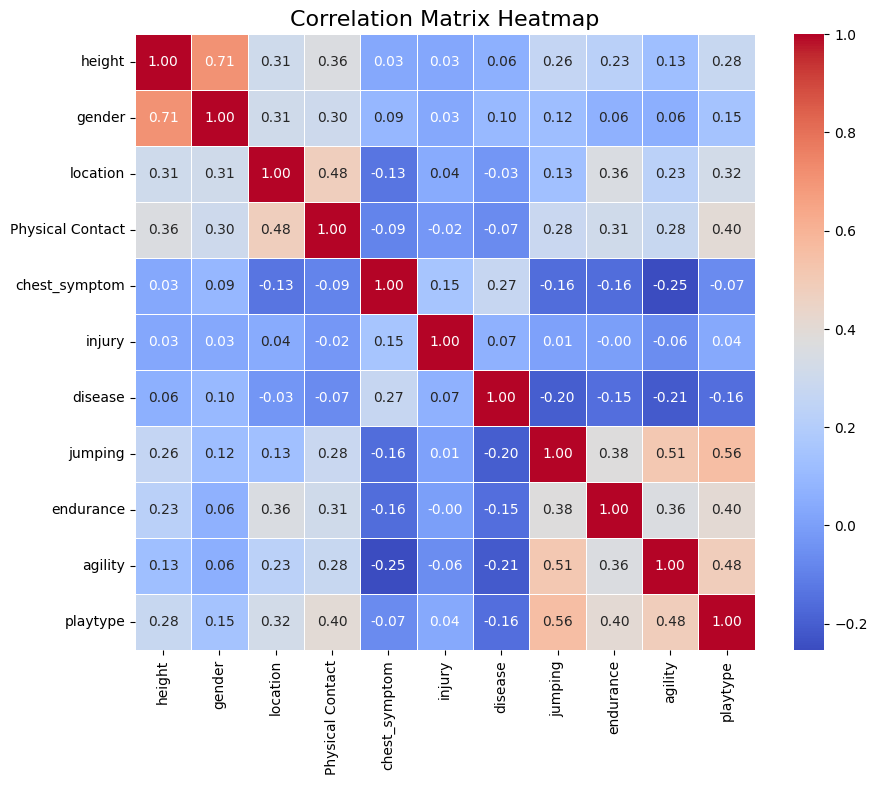

In [ ]:
###heatmap
df_2 = df_11.drop(columns=["preferred_sport_encoded"])

corr_matrix = df_2.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()


MODELING และ ประเมินโมเดล

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y) from the scaled dataframe
X_scaled = df_final.drop(columns=['preferred_sport_encoded'])
y_scaled = df_final['preferred_sport_encoded']

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_train_scaled:", y_train_scaled.shape)
print("Shape of y_test_scaled:", y_test_scaled.shape)

Shape of X_train_scaled: (234, 11)
Shape of X_test_scaled: (59, 11)
Shape of y_train_scaled: (234,)
Shape of y_test_scaled: (59,)


In [ ]:
from sklearn.svm import SVC
svm_model = SVC( C=10.0, gamma=0.01,
)
svm_model.fit(X_train_scaled, y_train_scaled)

SVC(C=10.0, gamma=0.01)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=12)
knn_model.fit(X_train_scaled, y_train_scaled)

KNeighborsClassifier(n_neighbors=12)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(
    max_depth=3,
    min_samples_leaf=1,
    ccp_alpha=0.0,
    random_state=42
)
decision_tree_model.fit(X_train_scaled, y_train_scaled)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(
    n_estimators=240,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=10,
    bootstrap=True,
    random_state=42,
)
random_forest_model.fit(X_train_scaled, y_train_scaled)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=240,
                       random_state=42)

In [ ]:
import numpy as np
from sklearn.model_selection import KFold, cross_validate

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = { 'accuracy': 'accuracy', 'f1': 'f1_weighted', 'precision': 'precision_weighted','recall': 'recall_weighted'}
models_for_cv = {"SVM": svm_model,"KNN": knn_model,"Decision Tree": decision_tree_model, "Random Forest": random_forest_model,}

cv_results_dict = {} # Dictionary to store cross-validation results

print("--- Cross-validation Results (5-fold) train set")
for name, model in models_for_cv.items():
    cv = cross_validate(model, X_train_scaled, y_train_scaled, cv=k_fold, scoring=scoring, n_jobs=-1,
    return_train_score=False )
    cv_results_dict[name] = cv # Store results in the dictionary

    print(f"\n{name}")
    for metric, values in cv.items():
        if metric.startswith('test_'):
            title = metric.replace('test_', '').capitalize()
            mean_pct = values.mean() * 100
            ci95_pct = values.std()  * 200      # 2*std เป็น ~95% CI แบบง่าย
            arr_pct  = np.round(values * 100, 2)
            print(f"  {title:<9}: {arr_pct}  Mean = {mean_pct:5.2f}% (+/- {ci95_pct:5.2f}%)")

--- Cross-validation Results (5-fold) train set

SVM
  Accuracy : [74.47 78.72 74.47 78.72 73.91]  Mean = 76.06% (+/-  4.37%)
  F1       : [73.77 78.21 74.55 79.66 73.48]  Mean = 75.93% (+/-  5.04%)
  Precision: [77.07 78.94 77.18 83.78 76.48]  Mean = 78.69% (+/-  5.35%)
  Recall   : [74.47 78.72 74.47 78.72 73.91]  Mean = 76.06% (+/-  4.37%)

KNN
  Accuracy : [74.47 68.09 76.6  68.09 71.74]  Mean = 71.79% (+/-  6.80%)
  F1       : [74.78 68.6  77.37 68.9  71.39]  Mean = 72.21% (+/-  6.81%)
  Precision: [76.77 72.37 80.06 72.99 71.25]  Mean = 74.69% (+/-  6.53%)
  Recall   : [74.47 68.09 76.6  68.09 71.74]  Mean = 71.79% (+/-  6.80%)

Decision Tree
  Accuracy : [70.21 70.21 76.6  74.47 69.57]  Mean = 72.21% (+/-  5.61%)
  F1       : [71.93 69.4  76.76 75.57 69.93]  Mean = 72.72% (+/-  5.93%)
  Precision: [74.83 73.78 78.21 77.81 70.93]  Mean = 75.11% (+/-  5.38%)
  Recall   : [70.21 70.21 76.6  74.47 69.57]  Mean = 72.21% (+/-  5.61%)

Random Forest
  Accuracy : [78.72 74.47 76.6  78.7

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("ประเมินโมเดล ของ Test Set: ")
for name, model in models_for_cv.items():
    y_pred = model.predict(X_test_scaled)

    accuracy  = accuracy_score(y_test_scaled, y_pred)
    f1        = f1_score(y_test_scaled, y_pred, average='weighted')
    precision = precision_score(y_test_scaled, y_pred, average='weighted')
    recall    = recall_score(y_test_scaled, y_pred, average='weighted')

    print(f"\n{name}")
    print(f"  Accuracy : {accuracy:.4f}")
    print(f"  F1-score : {f1:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall   : {recall:.4f}")

ประเมินโมเดล ของ Test Set: 

SVM
  Accuracy : 0.8136
  F1-score : 0.8103
  Precision: 0.8171
  Recall   : 0.8136

KNN
  Accuracy : 0.8136
  F1-score : 0.8077
  Precision: 0.8191
  Recall   : 0.8136

Decision Tree
  Accuracy : 0.7966
  F1-score : 0.7900
  Precision: 0.7939
  Recall   : 0.7966

Random Forest
  Accuracy : 0.8305
  F1-score : 0.8267
  Precision: 0.8309
  Recall   : 0.8305


Confusion Matrices on Test Set 


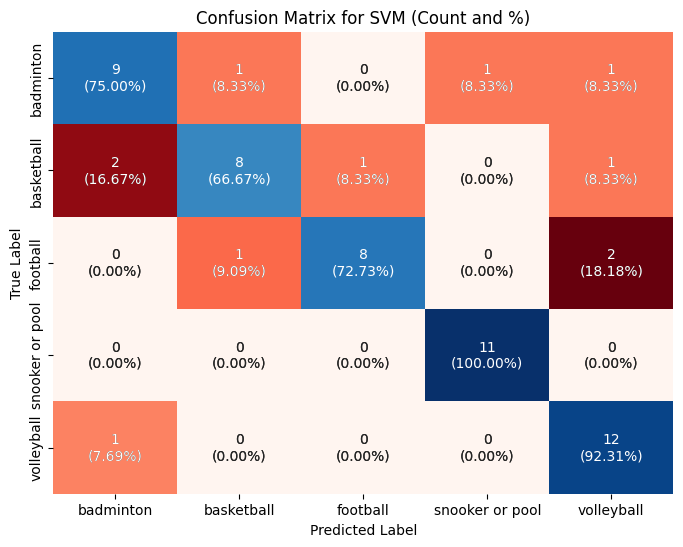

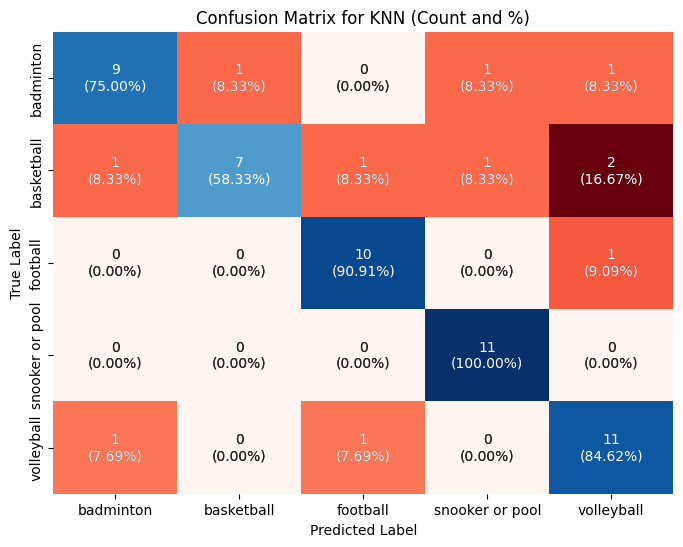

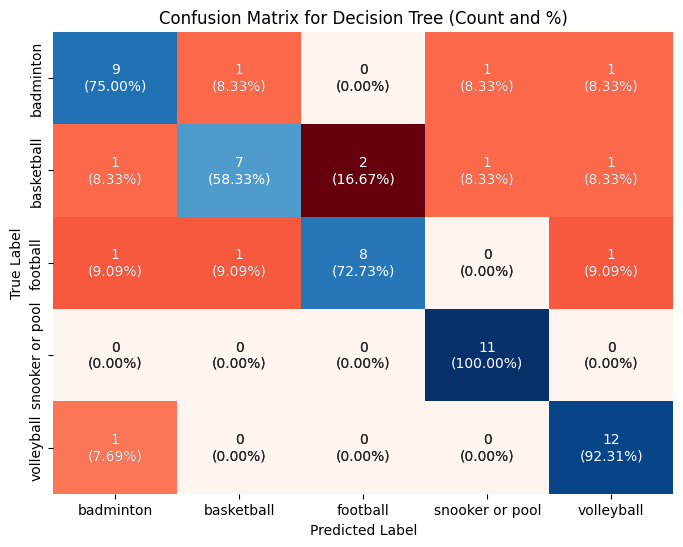

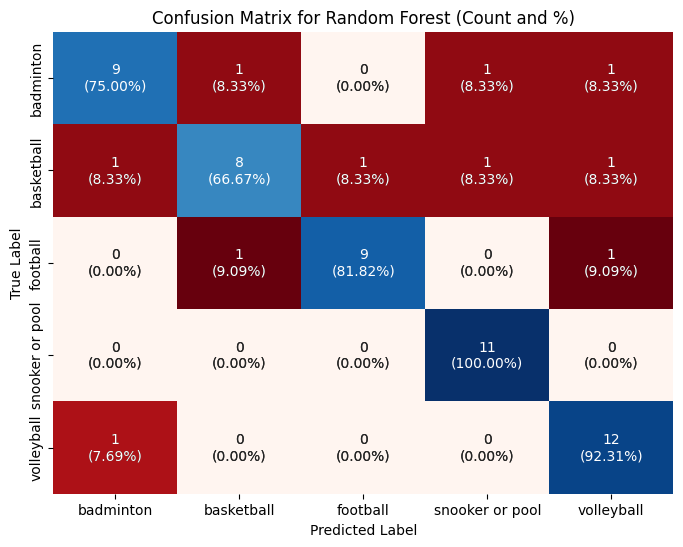

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("Confusion Matrices on Test Set ")

# Get the class names from the label encoder for the target variable
class_names = label_encoder_sport.classes_

for name, model in models_for_cv.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test_scaled, y_pred)

    # Calculate confusion matrix with percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    # Create annotation with both count and percentage
    annot_labels = np.asarray([f'{count}\n({perc:.2%})' for count, perc in zip(cm.flatten(), cm_percent.flatten())]).reshape(cm.shape)

    # Create a custom colormap to highlight incorrect predictions
    # Set diagonal values to white and off-diagonal values to a color
    mask_diag = np.eye(cm.shape[0], dtype=bool)
    mask_off_diag = ~mask_diag

    # Use Reds for off-diagonal elements to highlight incorrect predictions
    cmap = plt.cm.Blues
    cmap_red = plt.cm.Reds

    sns.heatmap(cm_percent, annot=annot_labels, fmt='', cmap=cmap, cbar=False,
                xticklabels=class_names, yticklabels=class_names,
                annot_kws={"size": 10}) # Adjust annotation size for readability

    # Overlay heatmap for incorrect predictions
    sns.heatmap(np.where(mask_off_diag, cm_percent, np.nan), annot=annot_labels, fmt='', cmap=cmap_red, cbar=False,
                xticklabels=class_names, yticklabels=class_names,
                annot_kws={"size": 10})

    plt.title(f'Confusion Matrix for {name} (Count and %)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [ ]:
print("Model Performance Comparison on Test Set:")


Model Performance Comparison on Test Set:


Feature Importance from Random Forest Model:


,Feature,Importance
10,playtype,0.176106
0,height,0.172985
9,agility,0.151397
3,Physical Contact,0.145622
2,location,0.112258
7,jumping,0.104075
1,gender,0.037583
4,chest_symptom,0.029661
8,endurance,0.028131
5,injury,0.024395


/tmp/ipython-input-1241065190.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')


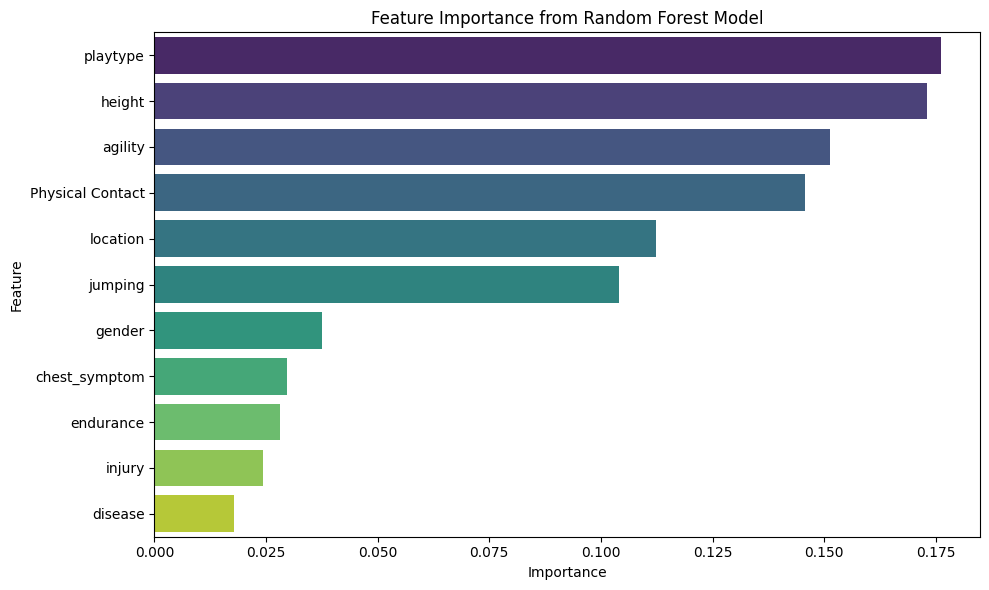

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = random_forest_model.feature_importances_

features_df = pd.DataFrame({'Feature': X_train_scaled.columns, 'Importance': feature_importances})

# Sort features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importance from Random Forest Model:")
display(features_df)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
print("การวิเคราะห์ความสำคัญของ Feature และประสิทธิภาพของโมเดล Random Forest:")
print("\nความสำคัญของ Features จากโมเดล Random Forest:")
display(features_df)




การวิเคราะห์ความสำคัญของ Feature และประสิทธิภาพของโมเดล Random Forest:

ความสำคัญของ Features จากโมเดล Random Forest:


,Feature,Importance
10,playtype,0.176106
0,height,0.172985
9,agility,0.151397
3,Physical Contact,0.145622
2,location,0.112258
7,jumping,0.104075
1,gender,0.037583
4,chest_symptom,0.029661
8,endurance,0.028131
5,injury,0.024395
